In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iphone-customer-reviews-nlp/iphone.csv


In [34]:
#Lib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
review_ip = pd.read_csv('/kaggle/input/iphone-customer-reviews-nlp/iphone.csv')
review_ip.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [4]:
review_ip.columns

Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')

In [5]:
review_ip.dtypes

productAsin          object
country              object
date                 object
isVerified             bool
ratingScore           int64
reviewTitle          object
reviewDescription    object
reviewUrl            object
reviewedIn           object
variant              object
variantAsin          object
dtype: object

In [6]:
# Convert string to datetime
review_ip['date'] = pd.to_datetime(review_ip['date'], dayfirst=True) # Assuming day-month-year format

In [23]:
review_ip.dtypes

productAsin                  object
country                      object
date                 datetime64[ns]
isVerified                     bool
ratingScore                   int64
reviewTitle                  object
reviewDescription            object
reviewUrl                    object
reviewedIn                   object
variant                      object
variantAsin                  object
year                          int32
month                         int32
dtype: object

In [8]:
review_ip['year'] = review_ip['date'].dt.year
review_ip['month'] = review_ip['date'].dt.month


In [9]:
review_ip.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,year,month
0,B09G9BL5CP,India,2024-08-11,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2024,8
1,B09G9BL5CP,India,2024-08-16,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2024,8
2,B09G9BL5CP,India,2024-05-14,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2024,5
3,B09G9BL5CP,India,2024-06-24,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2024,6
4,B09G9BL5CP,India,2024-05-18,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2024,5


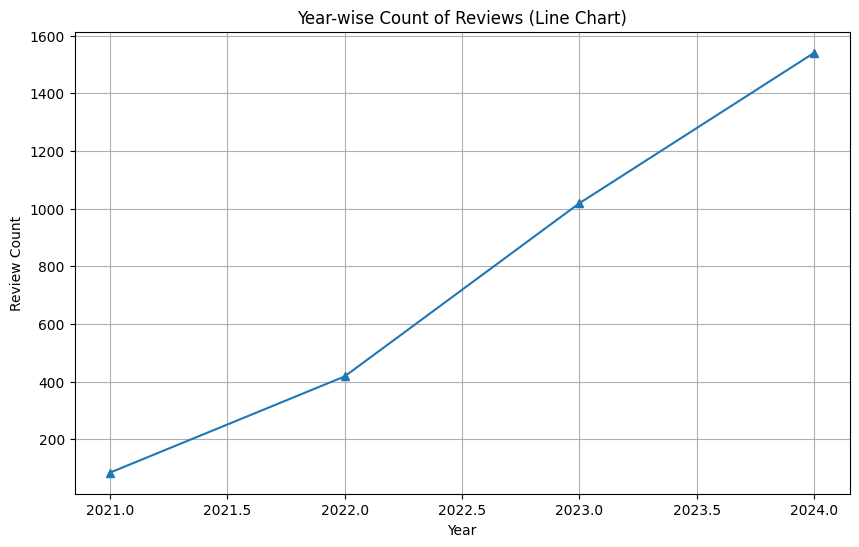

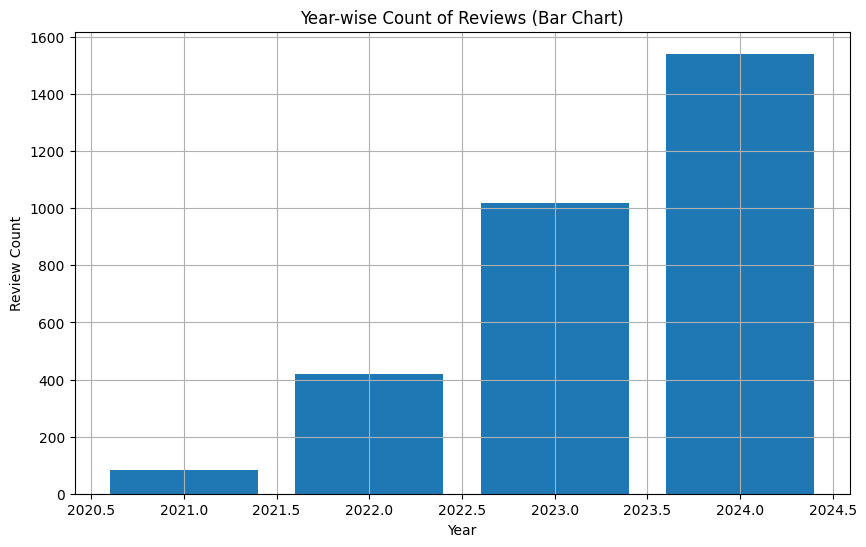

In [19]:
# Group by 'year' and calculate count of reviews
yearly_count = review_ip.groupby('year')['reviewTitle'].count().reset_index()

# Rename columns for clarity
yearly_count.columns = ['Year', 'Review Count']

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_count['Year'], yearly_count['Review Count'], marker='^')
plt.title('Year-wise Count of Reviews (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_count['Year'], yearly_count['Review Count'])
plt.title('Year-wise Count of Reviews (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

In [14]:
review_ip.productAsin.nunique()

7

In [15]:
review_ip.variant.nunique()

86

In [16]:
review_ip.variant.unique()

array(['Colour: MidnightSize: 256 GB', 'Colour: PinkSize: 256 GB',
       'Colour: BlueSize: 256 GB', 'Colour: GreenSize: 256 GB',
       'Colour: PinkSize: 128 GB', 'Colour: StarlightSize: 256 GB',
       'Colour: GreenSize: 128 GB', 'Colour: StarlightSize: 128 GB',
       'Colour: MidnightSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 128 GB', 'Colour: BlueSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 256 GB',
       'Size: 256GBColor: (Product) RED', 'Size: 256GBColor: Pink',
       'Size: 256GBColor: Midnight', 'Size: 128GBColor: Pink',
       'Size: 128GBColor: blue', 'Size: 128GBColor: starlight',
       'Size: 128GBColor: Midnight', 'Size: 128GBColor: green',
       'Size: 128GBColor: (Product) RED', 'Size: 256GBColor: starlight',
       'Size: 256GBColor: blue', 'Size: 512GBColor: starlight',
       'Size: 512GBColor: (Product) RED', 'Size: 512 GBColour: Midnight',
       'Size: 128 GBColour: Blue', 'Size: 128 GBColour: Red',
       'Size: 256 GBColour: Red', 'Size: 512 

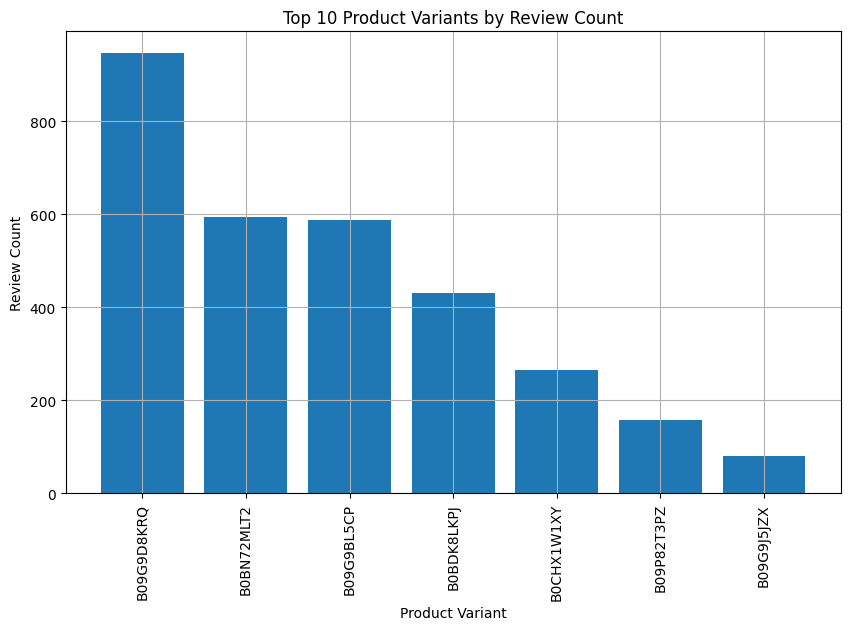

In [18]:
product_counts = review_ip.groupby('productAsin')['reviewTitle'].count().reset_index()

# Rename columns for clarity
product_counts.columns = ['Product Variant', 'Review Count']

# Sort the data by review count in descending order
product_counts = product_counts.sort_values(by='Review Count', ascending=False)

# Plot the top 10 product variants with the most reviews
top_products = product_counts.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_products['Product Variant'], top_products['Review Count'])
plt.title('Top 10 Product Variants by Review Count')
plt.xlabel('Product Variant')
plt.ylabel('Review Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [24]:
#launch_years

,Product Variant,Launch Year
0,B09G9BL5CP,2021
1,B09G9D8KRQ,2021
2,B09G9J5JZX,2021
3,B09P82T3PZ,2022
4,B0BDK8LKPJ,2022
5,B0BN72MLT2,2023
6,B0CHX1W1XY,2023


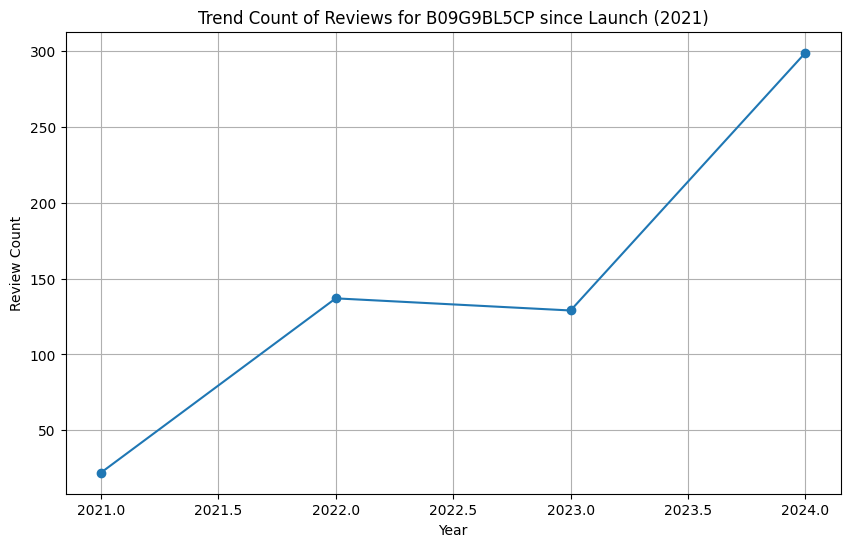

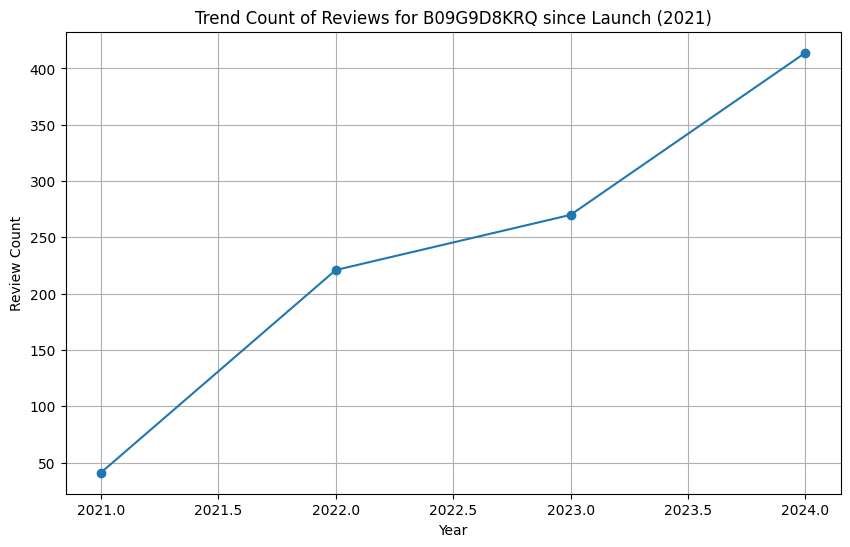

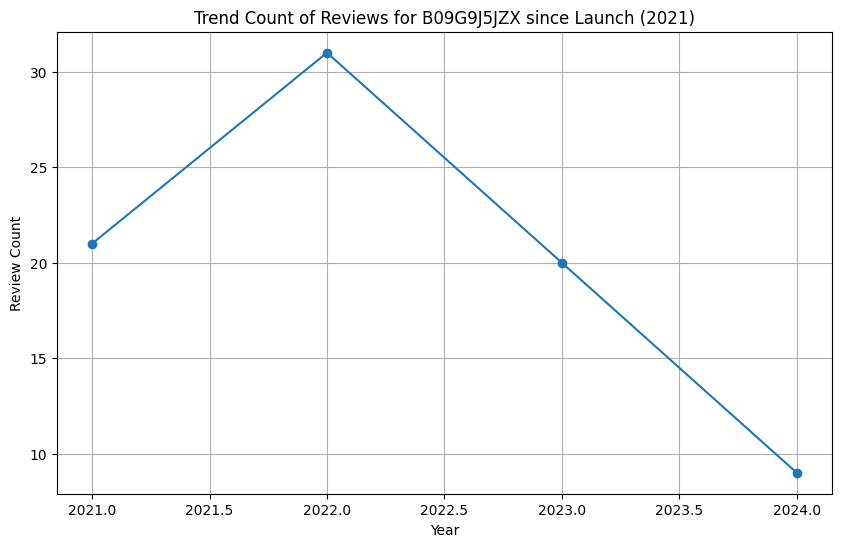

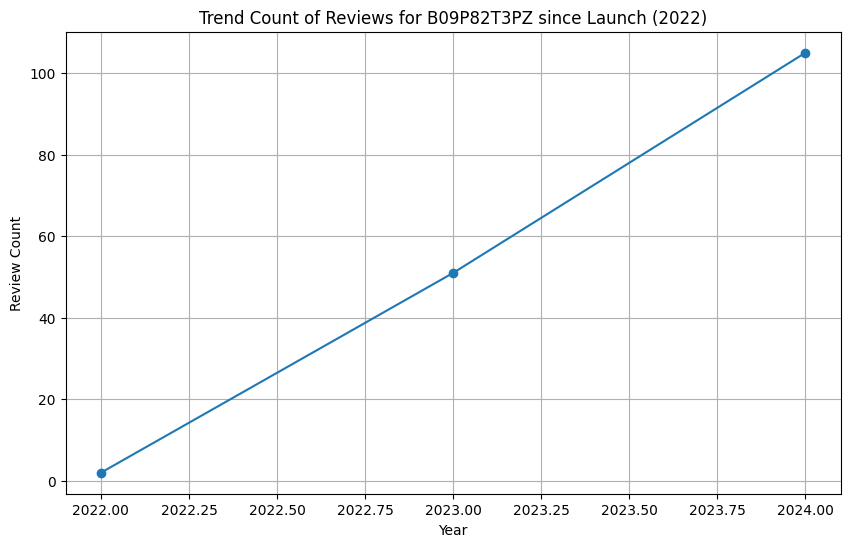

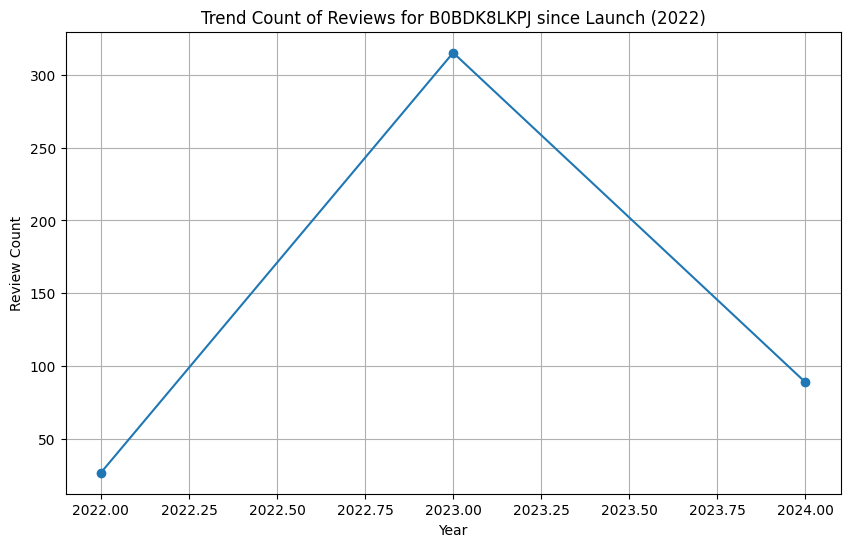

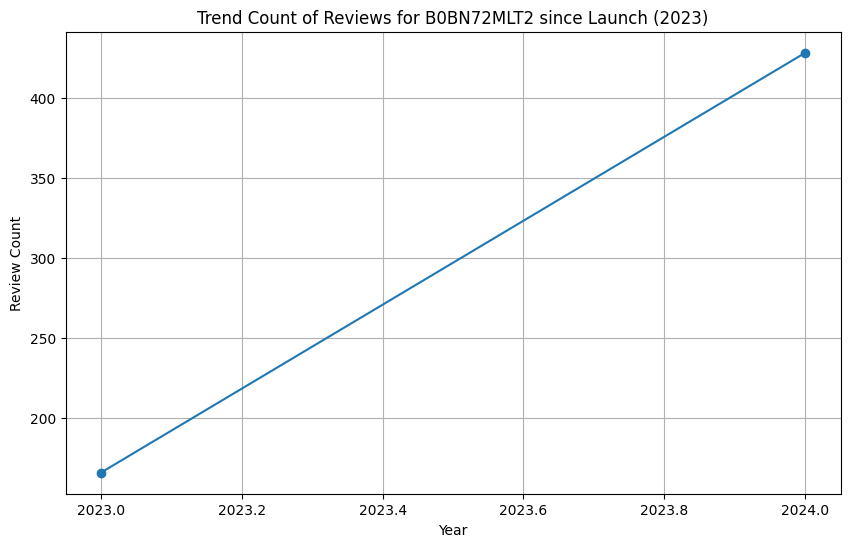

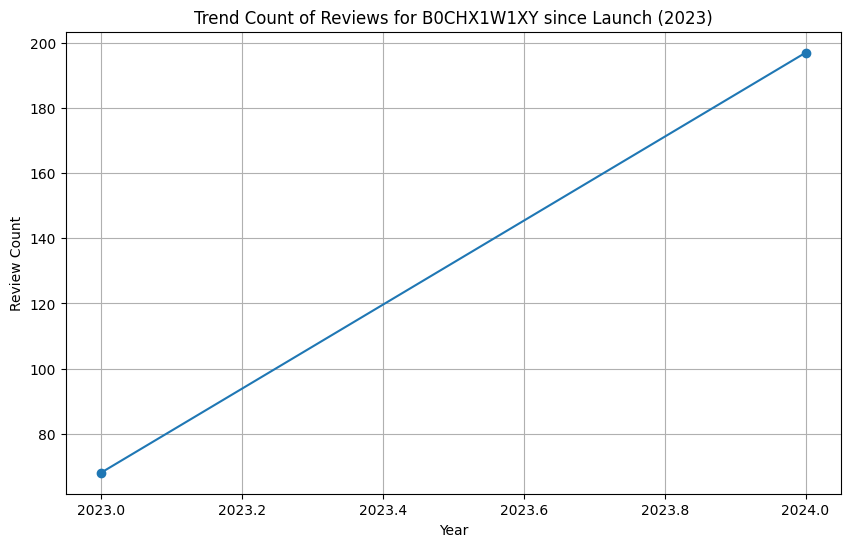

In [26]:
launch_years = review_ip.groupby('productAsin')['year'].min().reset_index()
launch_years.columns = ['productAsin', 'Launch Year']

# Merge the launch years with the original data
review_ip = pd.merge(review_ip, launch_years, on='productAsin')

# Group by 'productAsin' and 'year' to calculate the review count
review_counts = review_ip.groupby(['productAsin', 'year'])['reviewTitle'].count().reset_index()

# Pivot the data to create a separate column for each product variant
pivot_data = review_counts.pivot(index='year', columns='productAsin', values='reviewTitle')

# Create a separate plot for each product variant
for product in pivot_data.columns:
    product_data = pivot_data[product]
    launch_year = launch_years.loc[launch_years['productAsin'] == product, 'Launch Year'].values[0]
    
    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data.values, marker='o')
    plt.title(f'Trend Count of Reviews for {product} since Launch ({launch_year})')
    plt.xlabel('Year')
    plt.ylabel('Review Count')
    plt.grid(True)
    plt.show()

<Figure size 1000x600 with 0 Axes>

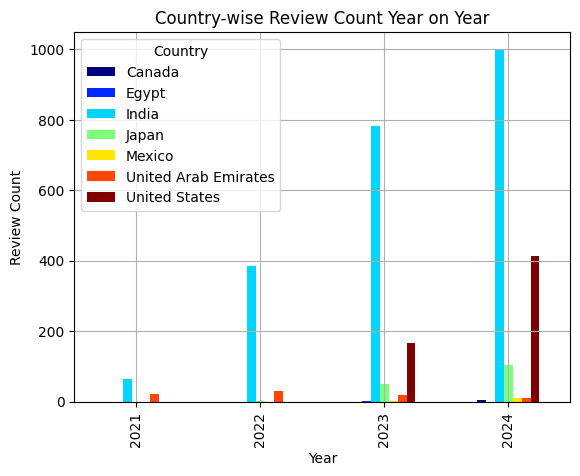

In [28]:
# Group by 'country' and 'year' to calculate the review count
review_counts = review_ip.groupby(['country', 'year'])['reviewTitle'].count().reset_index()

# Pivot the data to create a separate column for each country
pivot_data = review_counts.pivot(index='year', columns='country', values='reviewTitle')

# Create a bar chart with different colors for each country
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', colormap='jet')  # Use a colormap to automatically generate colors
plt.title('Country-wise Review Count Year on Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.legend(title='Country')
plt.grid(True)
plt.show()

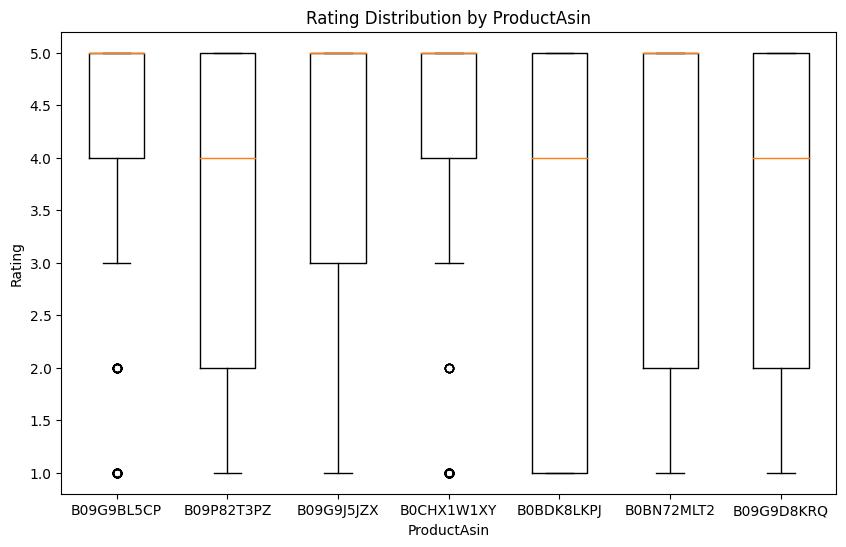

In [33]:
import matplotlib.pyplot as plt

# Group by productAsin and plot rating distribution
plt.figure(figsize=(10, 6))
plt.boxplot([review_ip[review_ip['productAsin'] == productAsin]['ratingScore'] for productAsin in review_ip['productAsin'].unique()], labels=review_ip['productAsin'].unique())
plt.xlabel('ProductAsin')
plt.ylabel('Rating')
plt.title('Rating Distribution by ProductAsin')
plt.show()
		

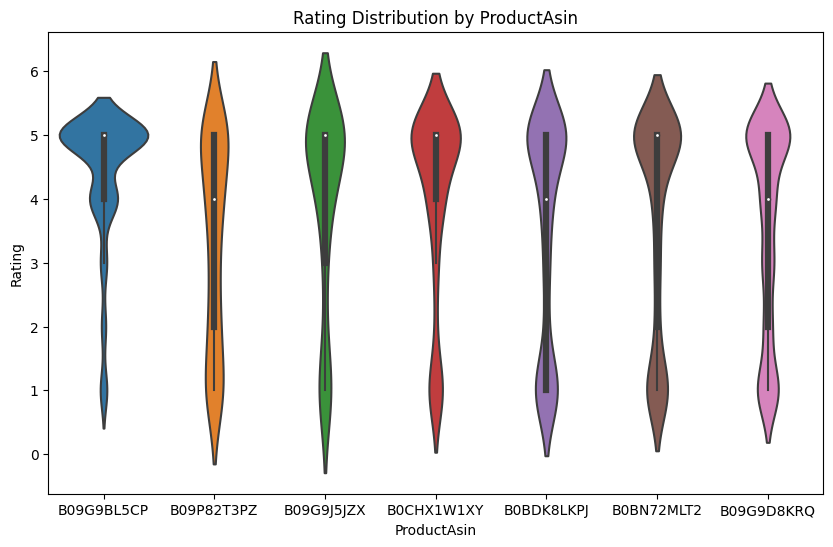

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='productAsin', y='ratingScore', data=review_ip)
plt.xlabel('ProductAsin')
plt.ylabel('Rating')
plt.title('Rating Distribution by ProductAsin')
plt.show()

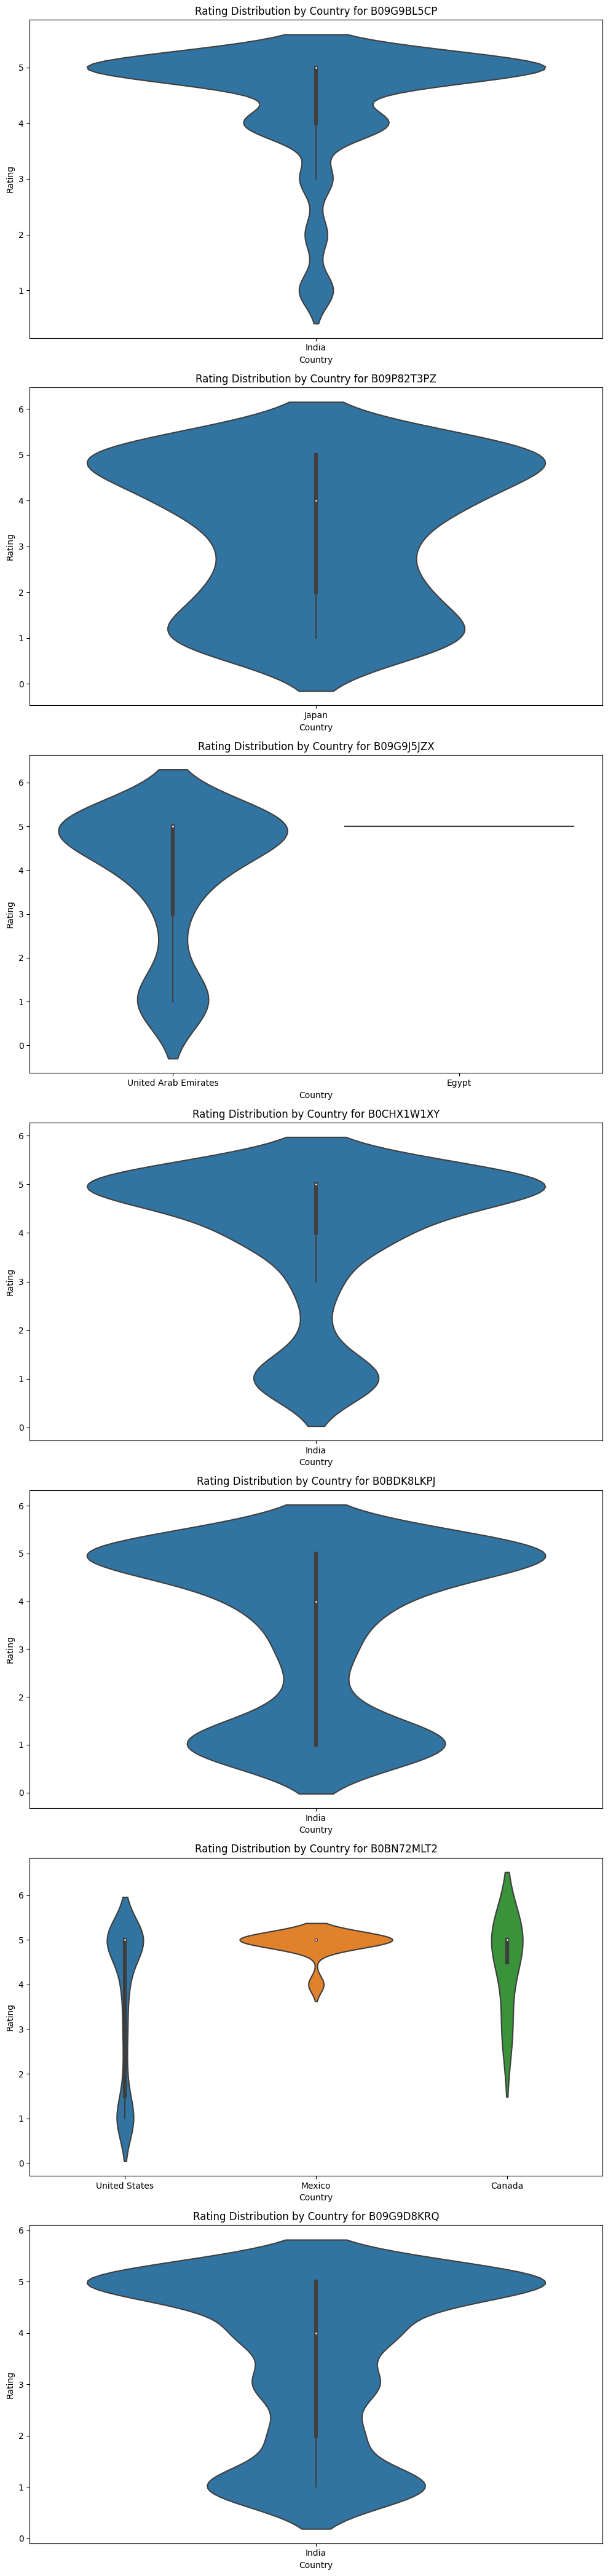

In [39]:
productAsin_values = review_ip['productAsin'].unique()

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(productAsin_values), figsize=(10, 6*len(productAsin_values)))

# Loop through each productAsin value
for i, productAsin in enumerate(productAsin_values):
    # Filter data for current productAsin
    product_df = review_ip[review_ip['productAsin'] == productAsin]
    
    # Create a violin plot for current productAsin
    sns.violinplot(x='country', y='ratingScore', data=product_df, ax=axes[i])
    
    # Set title and labels for current subplot
    axes[i].set_title(f'Rating Distribution by Country for {productAsin}')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

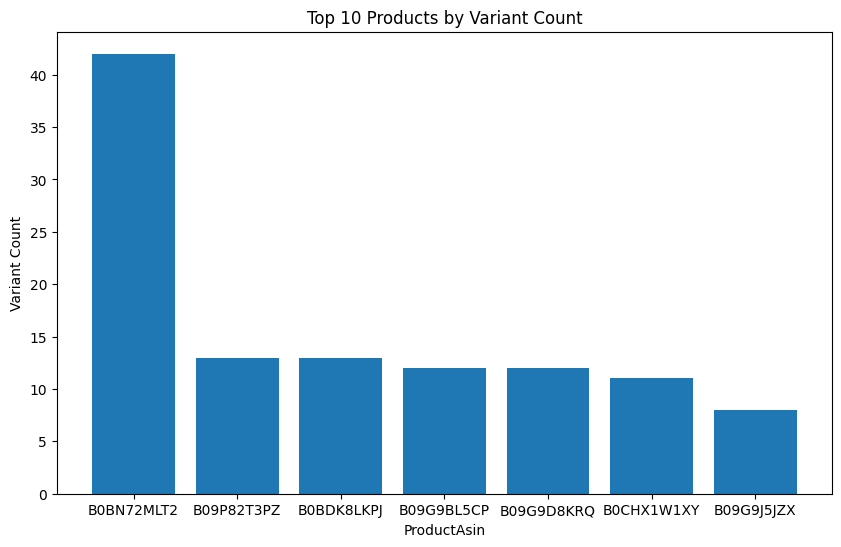

In [42]:
# Group by productAsin and count unique variants
variant_counts = review_ip.groupby('productAsin')['variant'].nunique().reset_index()

# Sort by variant count in descending order
variant_counts = variant_counts.sort_values(by='variant', ascending=False)

# Select top 10 products
top_products = variant_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_products['productAsin'], top_products['variant'])
plt.xlabel('ProductAsin')
plt.ylabel('Variant Count')
plt.title('Top 10 Products by Variant Count')
plt.show()
		

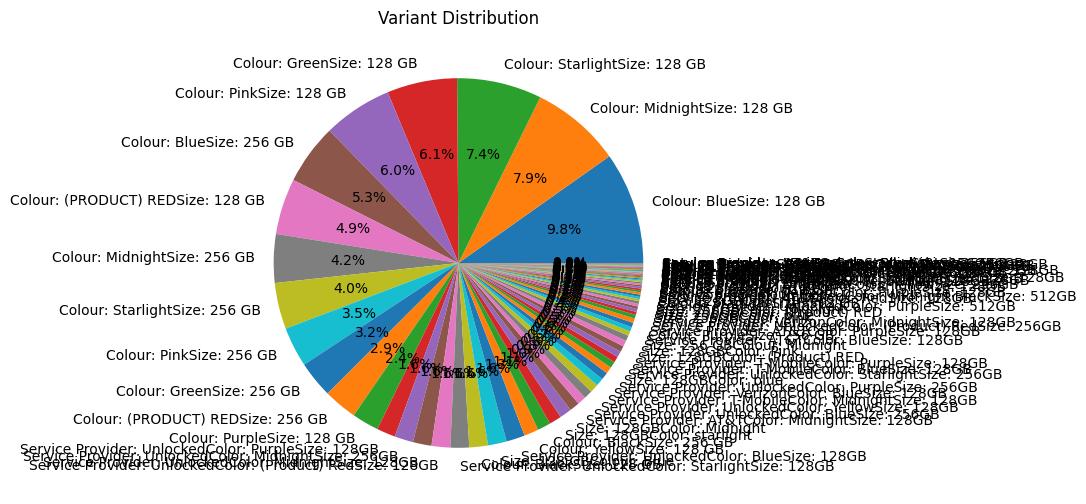

In [49]:

# Count the occurrences of each variant
variant_counts = review_ip['variant'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(variant_counts.values, labels=variant_counts.index, autopct='%1.1f%%')
plt.title('Variant Distribution')
plt.show()

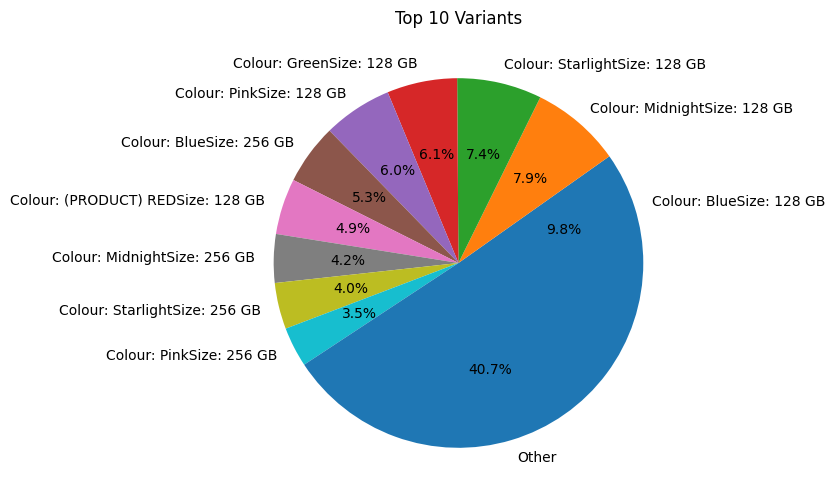

In [50]:
variant_counts = review_ip['variant'].value_counts()

# Get the top 10 variants
top_10_variants = variant_counts.head(10)

# Merge all other variants into one category
other_variants = variant_counts.iloc[10:].sum()
top_10_variants.loc['Other'] = other_variants

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_variants.values, labels=top_10_variants.index, autopct='%1.1f%%')
plt.title('Top 10 Variants')
plt.show()

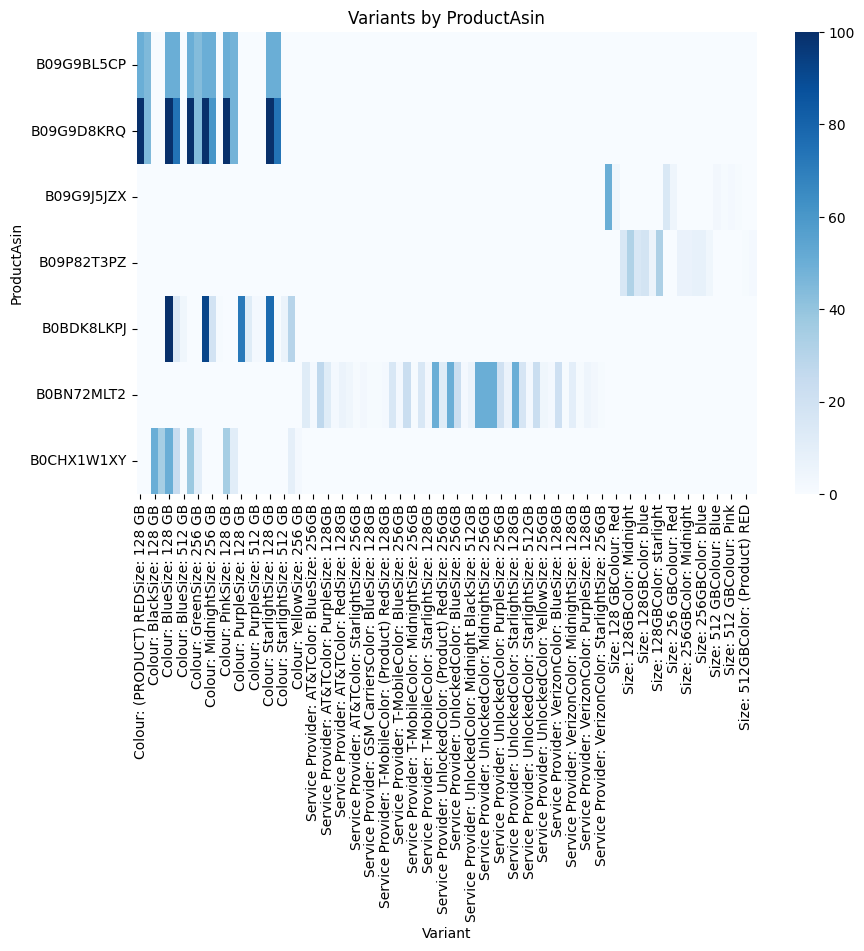

In [51]:
# Pivot the data to create a matrix of variants by productAsin
variant_matrix = pd.pivot_table(review_ip, index='productAsin', columns='variant', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(variant_matrix, cmap='Blues')
plt.xlabel('Variant')
plt.ylabel('ProductAsin')
plt.title('Variants by ProductAsin')
plt.show()

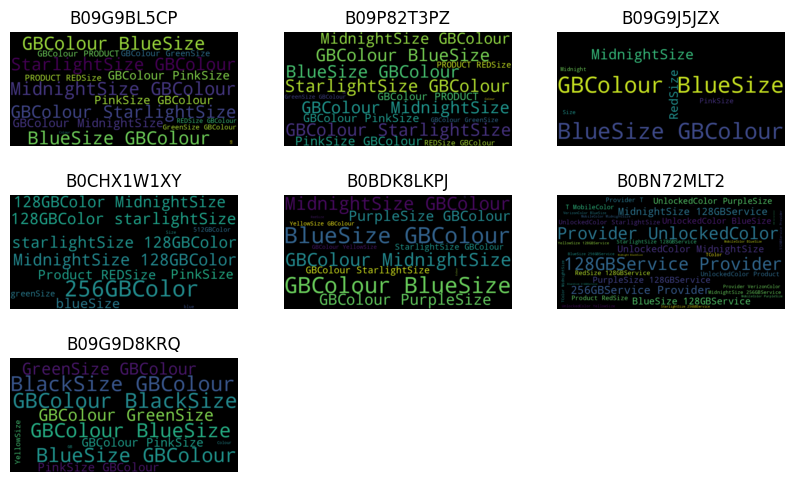

In [54]:
from wordcloud import WordCloud

# Group by productAsin and create a word cloud of variants
variant_clouds = review_ip.groupby('productAsin')['variant'].apply(lambda x:''.join(x))

# Create a plot
plt.figure(figsize=(10, 6))
for index, cloud in enumerate(variant_clouds):
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(cloud)
    plt.subplot(3, 3, index+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(review_ip['productAsin'].unique()[index])
plt.show()